## Decision Tree using customer Churn Data

### Import all Libraries

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import plotly.express as pe
import seaborn as sns
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV

### Import the Dataset to Pandas DF

In [70]:
data = pd.read_csv('..//./csv/customer_churn.csv')
df = pd.DataFrame(data)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Basic Checks on Data

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
df.isna().sum()
df.duplicated().sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Interpretation
  1. The total charges are in showing in object data type, therefore we need to change it to numeric value
  2. There are no null or duplicate value found in other columns
  3. Changing Total Charges to float64, for the 'errors' we can use one of the below 3 option
       1. coerce = instead of blank space put 'NA' ,
       2. secon  = if we use raise he raise the error,
       3. ignore = ignore the error

In [73]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As after data type change 11 null values are found we replace it with mean. 
The null values might be generated due any space or ? in the data

In [75]:
df.fillna(df['TotalCharges'].mean(),inplace = True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Statistical Description

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


### Exploratory Data Analysis
     1. Customers who have churned had total monthly charges more and less tenure
     2. The customers who is did not opt for any extra services or lines have churned more
     3. Perfrom simple chi square test just to check if customer churn and gender is associated

In [77]:
df_hist = df[['Churn','tenure','MonthlyCharges']].groupby(['Churn']).agg([np.mean],axis=0)
df_hist

,tenure,MonthlyCharges
,mean,mean
Churn,,
No,37.569965,61.265124
Yes,17.979133,74.441332


<Axes: xlabel='Churn'>

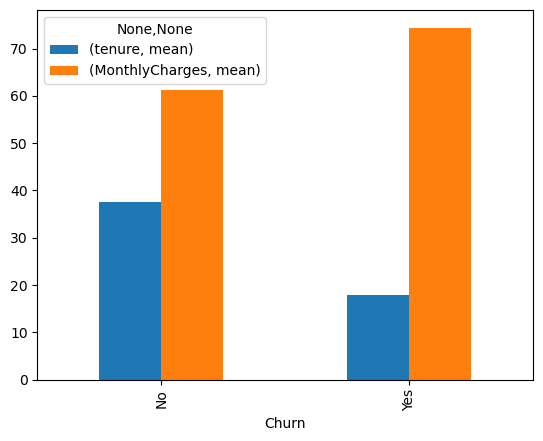

In [78]:
df_hist.plot(kind='bar')

In [79]:
df.groupby(['Churn'])['MultipleLines'].value_counts()

Churn  MultipleLines   
No     No                  2541
       Yes                 2121
       No phone service     512
Yes    Yes                  850
       No                   849
       No phone service     170
Name: count, dtype: int64

In [80]:
df.groupby('Churn')['PhoneService'].value_counts()

Churn  PhoneService
No     Yes             4662
       No               512
Yes    Yes             1699
       No               170
Name: count, dtype: int64

In [81]:
df.groupby('Churn')['InternetService'].value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: count, dtype: int64

In [82]:
df.groupby('Churn')['PaymentMethod'].value_counts()

Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: count, dtype: int64

In [83]:
df.groupby('Churn')['gender'].value_counts()

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: count, dtype: int64

### Chi-Square test

1. Create a crosstab i.e contigency table which is acceptable format for chi2_contingency
2. Null Hypothesis is the most common type of event. Here the H0 = The customer churn is dependent upon the Gender
3. Here as Pvalue < 0.05 the H0 is rejected. Hence the churning of customer is not based on gender

In [84]:
# Observed values
df_gender = pd.crosstab(df['Churn'],df['gender'])
df_gender

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [85]:
# statics, p-value, Degree of freedom & Expected values
stat, p, dof,expected = chi2_contingency(df_gender)
print(stat, p, dof) 

0.4840828822091383 0.48657873605618596 1


### Visulaization

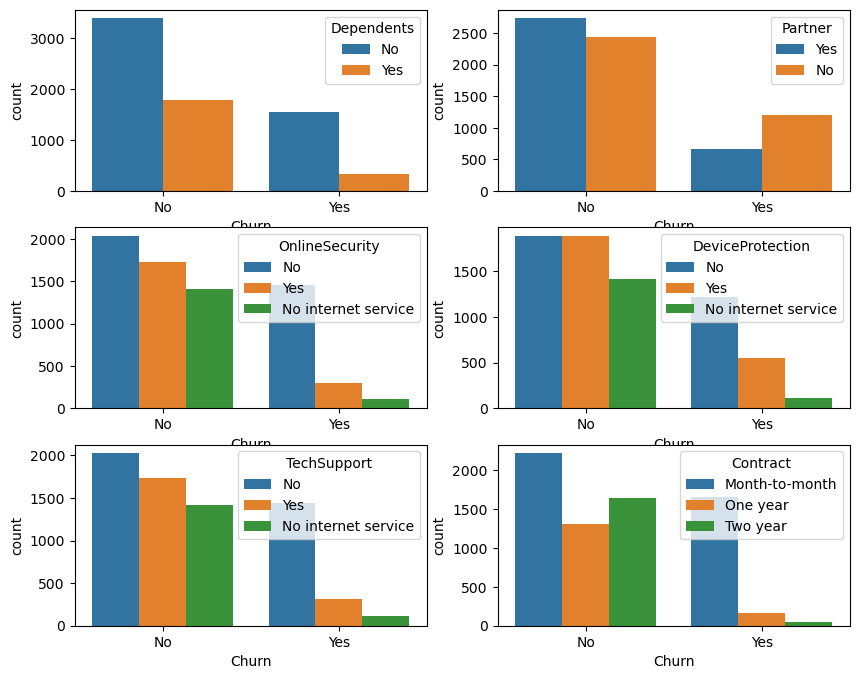

In [86]:
fig,ax=plt.subplots(nrows =3,ncols=2,figsize = (10,8))
sns.countplot(x=df['Churn'], hue=df['Dependents'],ax=ax[0,0])
sns.countplot(x=df['Churn'], hue=df['Partner'],ax=ax[0,1])
sns.countplot(x=df['Churn'], hue=df['OnlineSecurity'],ax=ax[1,0])
sns.countplot(x=df['Churn'], hue=df['DeviceProtection'],ax=ax[1,1])
sns.countplot(x=df['Churn'], hue=df['TechSupport'],ax=ax[2,0])
sns.countplot(x=df['Churn'], hue=df['Contract'],ax=ax[2,1])
plt.show()

#### Checking for outliers for continous data - No outliers deducted

<Axes: >

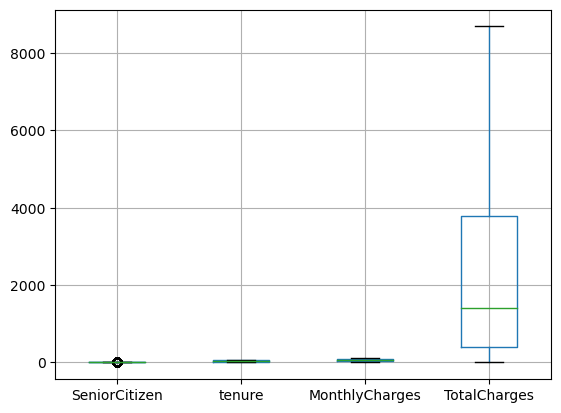

In [87]:
out_cols = ['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges']
df.boxplot(column=out_cols)

### Label Encoding for the categorical data

In [88]:
label_encoder = LabelEncoder()
cat_cols = [col for col in df.columns if df.dtypes[col] == 'O']
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

### Standardising the data
Used MinMaxScaler since most of the X variables are categorical variables

In [89]:
numeric_cols = ['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges']
std_scaler = MinMaxScaler()
for col in numeric_cols:
    df[col] = std_scaler.fit_transform(df[[col]])

### Droping unwanted column

In [90]:
df.drop('customerID',axis=1,inplace=True)

# Model 1 - Using VIF & CHI Square

### Variance Inflation factor

VIF helps us to check on Multicollinearity between the features, VIF > 5 are generally high dependent feature and 
hence will not be of best feature for modelling

In [91]:
vif_cols = df.columns
df_model = df.copy(True)
vif_df = pd.DataFrame()
vif_df['Features'] = vif_cols
vif_df['VIF Values'] = 7
for i in range(len(vif_cols)):
    vif_df['VIF Values'].iloc[i]= vif(df_model[vif_cols].values,i) 
    vif_data =  vif_df['VIF Values'].iloc[i] 
max_vif = 10
while max_vif > 6:    
    for i,col in enumerate(vif_df.values):
        if col[1] > 5:           
           if  vif_df['VIF Values'][i] > max_vif:
                    max_vif = vif_df['VIF Values'][i]
                    max_feature = vif_df['Features'][i] 
                    print(max_vif,max_feature)
                    df_model.drop(max_feature,axis=1,inplace=True)
                    vif_df.drop(index=i,axis=0,inplace=True)
                    max_vif = 0   
print('All features which exbhited multicollinearity has been removed')          
vif_df

15.762823099334625 tenure
13.478501242560391 PhoneService
16.11734353040515 MonthlyCharges
16.434011817365036 TotalCharges
All features which exbhited multicollinearity has been removed


,Features,VIF Values
0,gender,1.943719
1,SeniorCitizen,1.369204
2,Partner,2.819559
3,Dependents,1.964396
6,MultipleLines,2.726687
7,InternetService,4.407462
8,OnlineSecurity,2.263045
9,OnlineBackup,2.457526
10,DeviceProtection,2.625165
11,TechSupport,2.396502


In [92]:
df_model.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

### Define X and Y

In [93]:
X = df_model.iloc[:,0:-1]
y = df_model.iloc[:,-1]

### Chi Square test for checkiing important features

In [94]:
# Higher the chi scores, higher the importance
chi_scores = chi2(X,y)
print(chi_scores)

(array([2.58698618e-01, 1.34351545e+02, 8.24120826e+01, 1.33036443e+02,
       9.74692078e+00, 9.82102823e+00, 5.51611529e+02, 2.30086520e+02,
       1.91303140e+02, 5.23303866e+02, 7.49020319e+00, 8.23539949e+00,
       1.11578017e+03, 1.05680863e+02, 5.84922505e+01]), array([6.11015635e-001, 4.57695863e-031, 1.10476396e-019, 8.87672856e-031,
       1.79623344e-003, 1.72527862e-003, 5.61588231e-122, 5.70786894e-052,
       1.65153873e-043, 8.08623624e-116, 6.20355560e-003, 4.10811292e-003,
       1.22794132e-244, 8.66198711e-025, 2.04093269e-014]))


### Listing & Visualizing the Chi scores in descending order

In [95]:
sr_chi_scores = pd.Series(chi_scores[0],index = X.columns)
sr_chi_scores.sort_values(ascending=False, inplace=True)
sr_chi_scores

Contract            1115.780167
OnlineSecurity       551.611529
TechSupport          523.303866
OnlineBackup         230.086520
DeviceProtection     191.303140
SeniorCitizen        134.351545
Dependents           133.036443
PaperlessBilling     105.680863
Partner               82.412083
PaymentMethod         58.492250
InternetService        9.821028
MultipleLines          9.746921
StreamingMovies        8.235399
StreamingTV            7.490203
gender                 0.258699
dtype: float64

<Axes: >

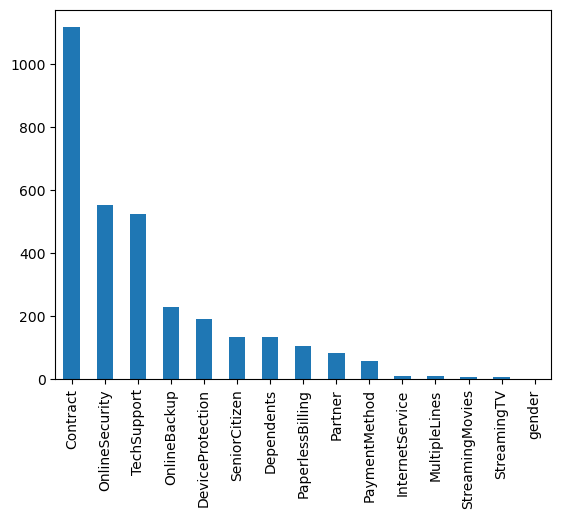

In [96]:
sr_chi_scores.plot(kind='bar')

### Selecting features which is having chi score > 50

In [97]:
X_col = [col for i, col in enumerate(sr_chi_scores.index) if sr_chi_scores.values[i] > 50]
X_col

['Contract',
 'OnlineSecurity',
 'TechSupport',
 'OnlineBackup',
 'DeviceProtection',
 'SeniorCitizen',
 'Dependents',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod']

In [98]:
X = df_model[X_col]
y = df_model.iloc[:,-1]

### Split train & test data and fit into the DT Model

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

### Model Metrics

In [100]:
y_pred = dt_model.predict(X_test)

In [101]:
accuracy_score(y_test,y_pred)

0.7530163236337828

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1021
           1       0.56      0.48      0.52       388

    accuracy                           0.75      1409
   macro avg       0.69      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409



<Axes: >

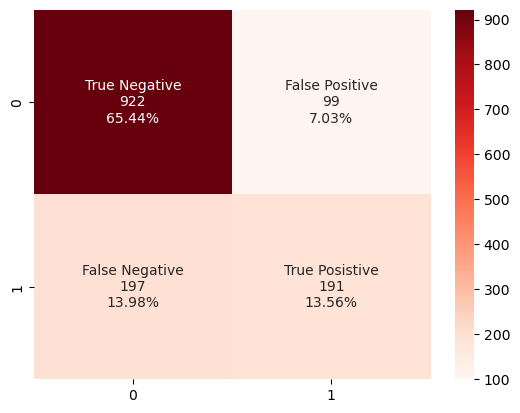

In [184]:
c_mat = confusion_matrix(y_test,y_pred)
label_name = ['True Negative','False Positive','False Negative','True Posistive']

group_counts = ['{0:0.0f}'.format(value) for value in c_mat.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in c_mat.flatten()/np.sum(c_mat)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(label_name,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(c_mat,annot=labels,cmap='Reds',fmt='')

### Visualizing the DT

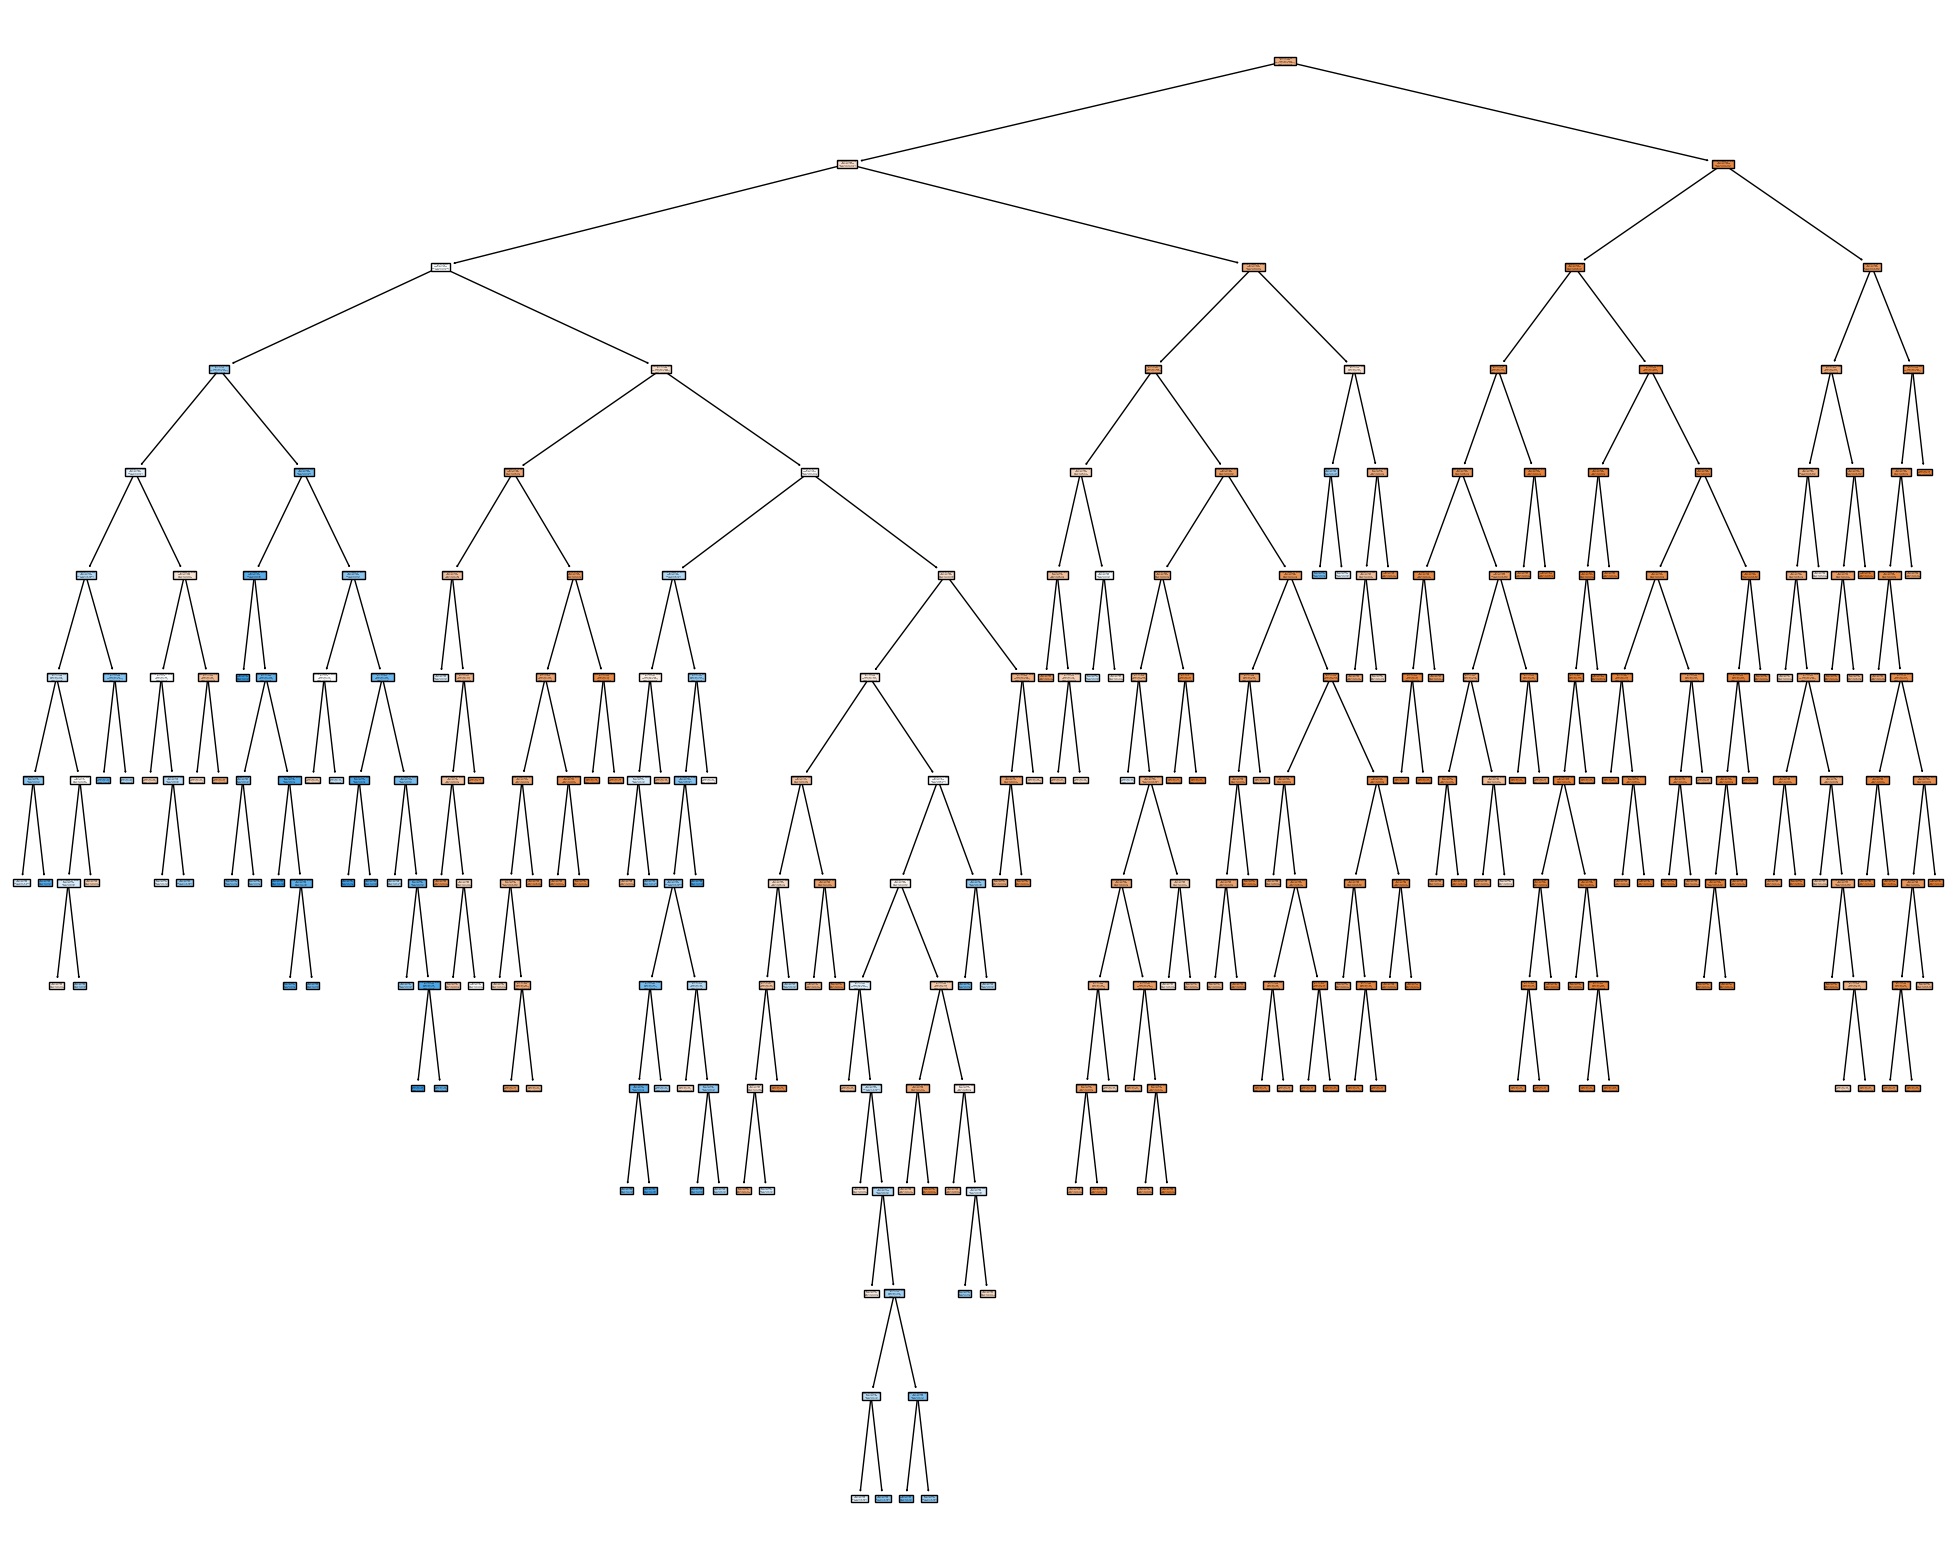

In [170]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model,
                   feature_names=X.columns,
                   class_names=['No Churn', "Churn"],
                   filled=True)
plt.savefig('decistion_tree_model1.pdf')

# Model 2 - Using VIF & CHI Square with Hyper parameter tuning using GridSearch

In [151]:
dt_model = DecisionTreeClassifier(random_state=7)
params = {'max_depth' : range(1, 30),
          'min_samples_leaf' : range(1, 30),
           'min_samples_split':range(1, 30), 
           'criterion':['gini','entropy']  }

Grid_search = GridSearchCV(estimator=dt_model, param_grid=params, cv =5, n_jobs=1,verbose=True,scoring='accuracy')
Grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48778 candidates, totalling 243890 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 30),
                         'min_samples_split': range(1, 30)},
             scoring='accuracy', verbose=True)

In [152]:
print('Best Parameters',Grid_search.best_params_ )
print('Best Score',Grid_search.best_score_ )

Best Parameters {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 22, 'min_samples_split': 2}
Best Score 0.7964156084860387


In [155]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth= 14, min_samples_leaf= 22, min_samples_split= 2)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=22)

In [156]:
y_pred = dt_model.predict(X_test)

In [157]:
accuracy_score(y_test,y_pred)

0.7899219304471257

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1021
           1       0.66      0.49      0.56       388

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



<Axes: >

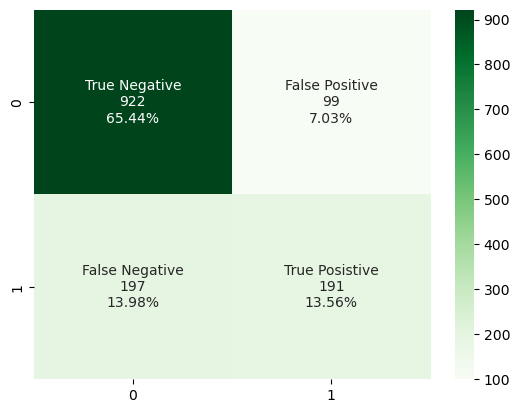

In [183]:
c_mat = confusion_matrix(y_test,y_pred)
label_name = ['True Negative','False Positive','False Negative','True Posistive']

group_counts = ['{0:0.0f}'.format(value) for value in c_mat.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in c_mat.flatten()/np.sum(c_mat)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(label_name,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(c_mat,annot=labels,cmap='Greens',fmt='')

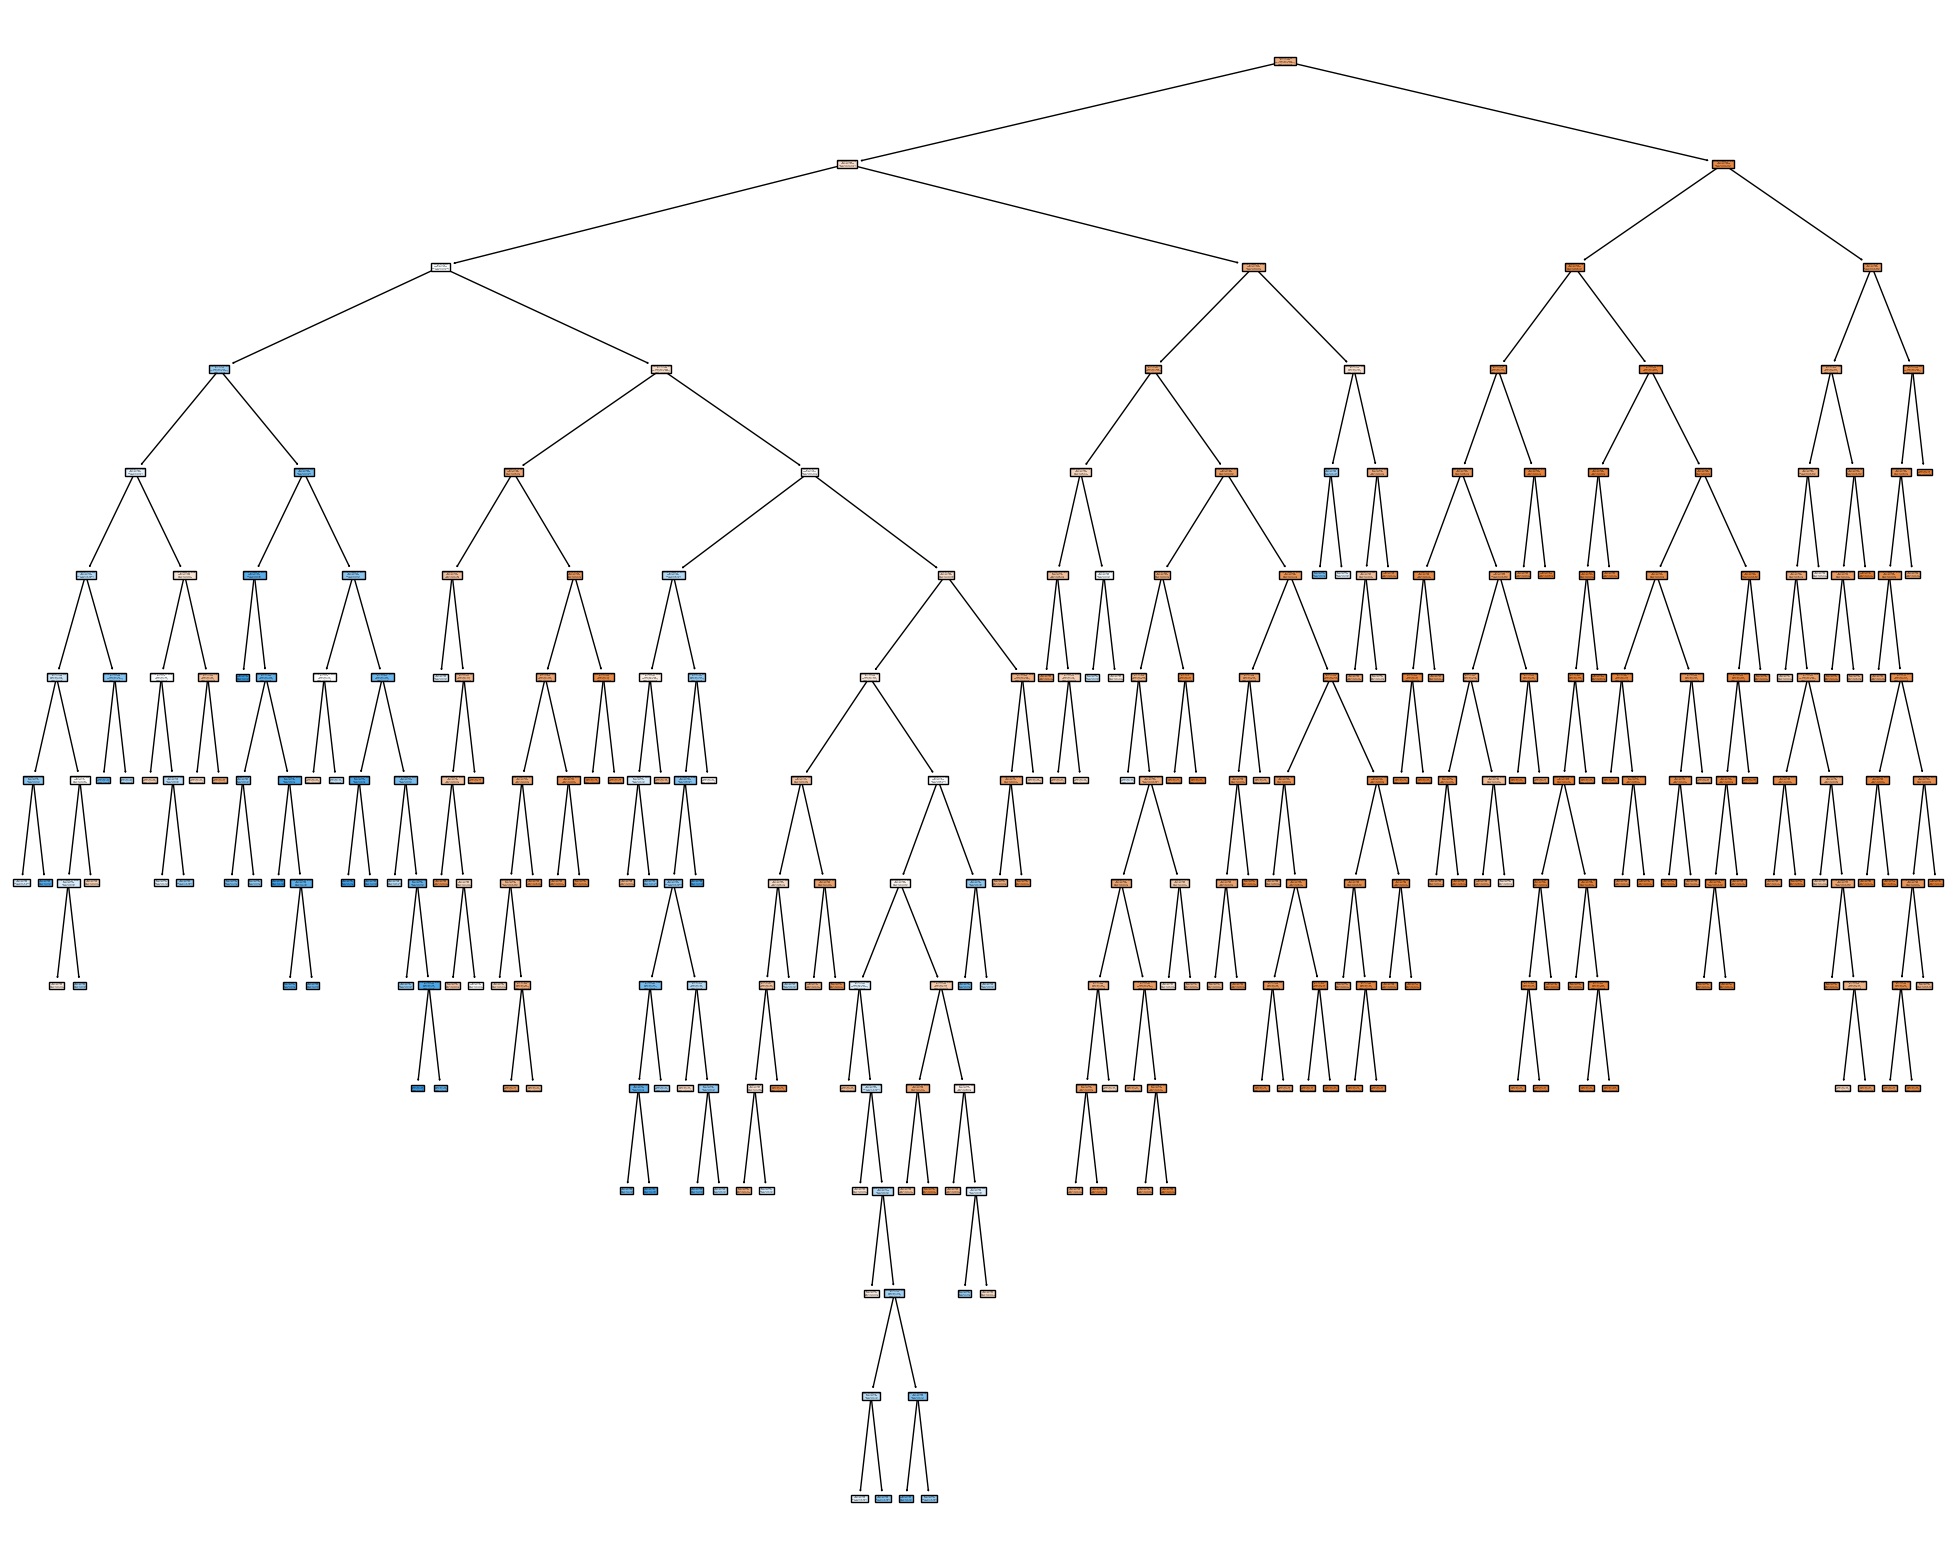

In [172]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model,
                   feature_names=X.columns,
                   class_names=['No Churn', "Churn"],
                   filled=True)
plt.savefig('decistion_tree_model2.pdf')

In [161]:
fig.savefig("decistion_tree_model2.png")

# Model 3 - Using only CHI Square

### Taking all columns from original data frame

In [103]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [106]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Chi Square Test

In [107]:
# Higher the chi scores, higher the importance
chi_scores = chi2(X,y)
print(chi_scores)

(array([2.58698618e-01, 1.34351545e+02, 8.24120826e+01, 1.33036443e+02,
       2.26096162e+02, 9.72606249e-02, 9.74692078e+00, 9.82102823e+00,
       5.51611529e+02, 2.30086520e+02, 1.91303140e+02, 5.23303866e+02,
       7.49020319e+00, 8.23539949e+00, 1.11578017e+03, 1.05680863e+02,
       5.84922505e+01, 5.09953708e+01, 7.32170902e+01]), array([6.11015635e-001, 4.57695863e-031, 1.10476396e-019, 8.87672856e-031,
       4.23385113e-051, 7.55142091e-001, 1.79623344e-003, 1.72527862e-003,
       5.61588231e-122, 5.70786894e-052, 1.65153873e-043, 8.08623624e-116,
       6.20355560e-003, 4.10811292e-003, 1.22794132e-244, 8.66198711e-025,
       2.04093269e-014, 9.25840542e-013, 1.16145713e-017]))


### Chi Square values & Visualization

In [108]:
sr_chi_scores = pd.Series(chi_scores[0],index = X.columns)
sr_chi_scores.sort_values(ascending=False, inplace=True)
sr_chi_scores

Contract            1115.780167
OnlineSecurity       551.611529
TechSupport          523.303866
OnlineBackup         230.086520
tenure               226.096162
DeviceProtection     191.303140
SeniorCitizen        134.351545
Dependents           133.036443
PaperlessBilling     105.680863
Partner               82.412083
TotalCharges          73.217090
PaymentMethod         58.492250
MonthlyCharges        50.995371
InternetService        9.821028
MultipleLines          9.746921
StreamingMovies        8.235399
StreamingTV            7.490203
gender                 0.258699
PhoneService           0.097261
dtype: float64

<Axes: >

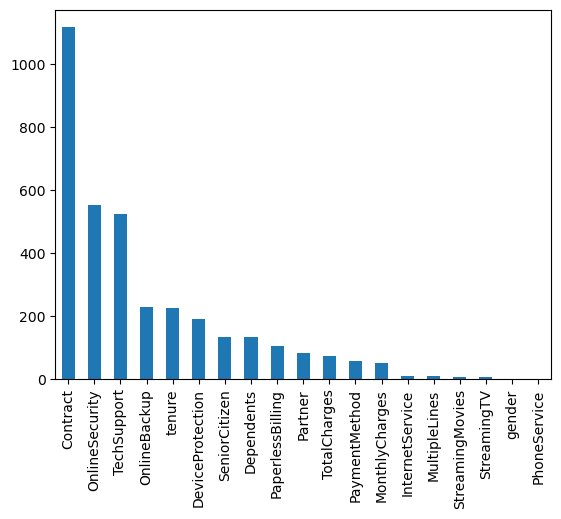

In [109]:
sr_chi_scores.plot(kind='bar')

### P value & Visualization

In [110]:
#if p-value > 0.05 , lower the importance
sr_p_scores = pd.Series(chi_scores[1],index = X.columns)
sr_p_scores.sort_values( ascending= True,inplace=True)
sr_p_scores

Contract            1.227941e-244
OnlineSecurity      5.615882e-122
TechSupport         8.086236e-116
OnlineBackup         5.707869e-52
tenure               4.233851e-51
DeviceProtection     1.651539e-43
SeniorCitizen        4.576959e-31
Dependents           8.876729e-31
PaperlessBilling     8.661987e-25
Partner              1.104764e-19
TotalCharges         1.161457e-17
PaymentMethod        2.040933e-14
MonthlyCharges       9.258405e-13
InternetService      1.725279e-03
MultipleLines        1.796233e-03
StreamingMovies      4.108113e-03
StreamingTV          6.203556e-03
gender               6.110156e-01
PhoneService         7.551421e-01
dtype: float64

<Axes: >

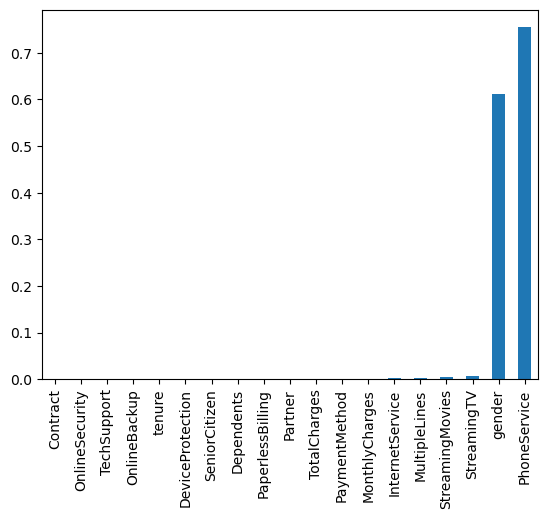

In [111]:
sr_p_scores.plot(kind='bar')

### Feature Selection

In [112]:
X_col = [col for i, col in enumerate(sr_chi_scores.index) if sr_chi_scores.values[i] > 50]
X_col

['Contract',
 'OnlineSecurity',
 'TechSupport',
 'OnlineBackup',
 'tenure',
 'DeviceProtection',
 'SeniorCitizen',
 'Dependents',
 'PaperlessBilling',
 'Partner',
 'TotalCharges',
 'PaymentMethod',
 'MonthlyCharges']

### Define X and Y

In [113]:
X = df[X_col]
y = df.iloc[:,-1]

### Split train & test data and fit into the DT Model

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

### Model Metrics

In [115]:
y_pred = dt_model.predict(X_test)

In [116]:
accuracy_score(y_test,y_pred)

0.7416607523066004

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1021
           1       0.53      0.50      0.52       388

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409



<Axes: >

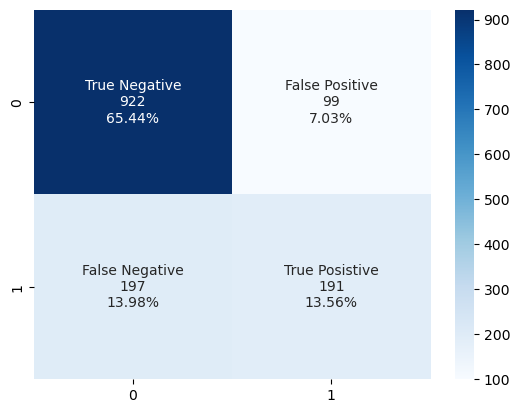

In [182]:
c_mat = confusion_matrix(y_test,y_pred)
label_name = ['True Negative','False Positive','False Negative','True Posistive']

group_counts = ['{0:0.0f}'.format(value) for value in c_mat.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in c_mat.flatten()/np.sum(c_mat)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(label_name,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(c_mat,annot=labels,cmap='Blues',fmt='')

# Model 4 - Simple model without VIF, Chi square and Hyper parameter tuning

### Define X and y

In [119]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

### Split train & test data and fit into the DT Model

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

### Model Metrics

In [121]:
y_pred = dt_model.predict(X_test)

In [122]:
accuracy_score(y_test,y_pred)

0.7423704755145494

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1021
           1       0.53      0.50      0.52       388

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409



<Axes: >

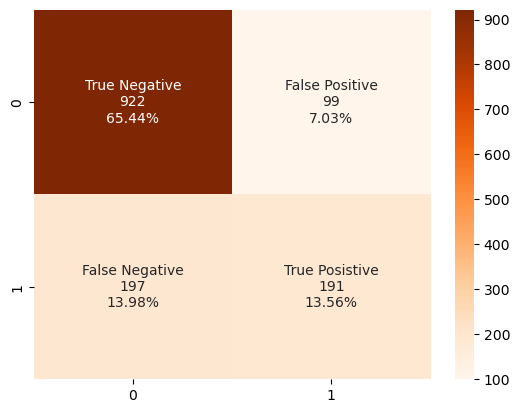

In [177]:
c_mat = confusion_matrix(y_test,y_pred)
label_name = ['True Negative','False Positive','False Negative','True Posistive']

group_counts = ['{0:0.0f}'.format(value) for value in c_mat.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in c_mat.flatten()/np.sum(c_mat)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(label_name,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(c_mat,annot=labels,cmap='Oranges',fmt='')

### Interpretation

    1. Out of 4 models tried the model 2 has given the best recall and f2 score
    2. Though accuracy score was only 78% the recall (90%) and f2 score (86%) makes the model best fit for our data set
    3. The Grid search CV did help us to get best hyper parameters to get best out of the model for 5 cross validation  